# <html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">CA4-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

   <div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Shahzad Momayez-sid:810100272 </h1>
       <h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou-sid:810100084 </h1>
       <h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzaneh-sid:810100194 </h1>

</div>
   

</html>











#  The Purpose Of The Assignment
The purpose of this assignment was to explore various loss functions and apply gradient descent
methods to optimize these functions.

<div style="background-color: #160aac; padding: 20px; text-align: center;">
    <h1 style="font-size: 36px; color: #ffffff;">Warm Up</h1>
</div>

## Display the first ten rows

In [112]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

diabetes = load_diabetes()
diabetes.target[:3]
diabetes.data.shape

(442, 10)

In [113]:

diabetes.data.shape

(442, 10)

In [114]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Define the target variable (dependent variable) as 'y'
df = df.assign(target = diabetes.target)

## Display the first ten rows

In [115]:
df.head(n=10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


## Data types of each feature

In [116]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

## Check for any missing values

In [117]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

## Normalize the features

In [118]:
columns = df.select_dtypes(np.number).columns
df[columns] = (df[columns] - df[columns].min()) / (df[columns].max() - df[columns].min())

We used min-max scaling because we don’t know the distribution of all features.

 Since we want the normalization to be consistent across all columns, we opted for min-max scaling.

  Standardization, on the other hand, is more suitable for features with a normal distribution.

## Split the data into training and testing sets

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train , y_test = train_test_split(df.drop(columns =["target"]), df['target'], test_size=0.05, random_state=42)

## Display the number of instances in both

In [120]:
print(f"number of rows in X training set is {X_train.shape[0]}  ")

number of rows in X training set is 419  


In [121]:
print(f"number of rows in Y training set is {y_train.shape[0]}  ")

number of rows in Y training set is 419  


In [122]:
print(f"number of rows in X test set is {X_test.shape[0]}  ")

number of rows in X test set is 23  


In [123]:
print(f"number of rows in Y test set is {y_test.shape[0]}  ")

number of rows in Y test set is 23  


# Main Task

## Part 1: Functions’ Implementation


The mean squared error (MSE) is another common metric used to evaluate the performance of a regression model. It measures the average of the squares of the errors or the differences between the actual values and the predicted values.

To calculate the mean squared error, you typically follow these steps:

1. For each data point in your dataset, calculate the squared difference between the actual value (y_true) and the predicted value (y_pred).
2. Sum up all these squared differences.
3. Divide the total sum of squared differences by the total number of data points to get the mean squared error.

The formula for calculating MSE is as follows:
$[ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2 $]

In simpler terms, MSE gives more weight to large errors compared to MAE. A lower MSE indicates that the model is making more accurate predictions, while a higher MSE suggests that the model's predictions are less accurate. It is important to consider the scale of MSE as it is in squared units of the target variable.

In [124]:
def get_mean_square_error(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")
    residuals = np.subtract(predicted_values, actual_values)
    mean_squared_error = np.mean(np.square(residuals))


    return mean_squared_error

RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.



In [125]:
def get_root_mean_square_error(predicted_values, actual_values):
        if len(predicted_values) != len(actual_values):
            raise ValueError("The lengths of predicted and actual values must match.")
        mean_squared_error = get_mean_square_error(predicted_values, actual_values)
        root_mean_square_error = np.sqrt(mean_squared_error)
        return root_mean_square_error

The mean absolute error (MAE) is a metric used to evaluate the performance of a regression model. It measures the average magnitude of errors between the actual values and the predicted values.

To calculate the mean absolute error, you typically follow these steps:

1. For each data point in your dataset, calculate the absolute difference between the actual value (y_true) and the predicted value (y_pred).
2. Sum up all these absolute differences.
3. Divide the total sum of absolute differences by the total number of data points to get the mean absolute error.

The formula for calculating MAE is as follows:
$[ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true}, i} - y_{\text{pred}, i}| ]$

In simpler terms, MAE gives you a good idea of how accurate your predictions are on average. A lower MAE indicates that the model is making more accurate predictions, while a higher MAE suggests that the model's predictions are less accurate.

In [126]:
def get_mean_absolute_error(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")
    residuals = np.abs(np.subtract(predicted_values, actual_values))
    mean_absolute_error = np.mean(residuals)
    return mean_absolute_error

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In [127]:
def get_r2_score(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")

    mean_actual_values = sum(actual_values) / len(actual_values)
    total_sum_of_squares = sum((y_i - mean_actual_values) ** 2 for y_i in actual_values)
    residual_sum_of_squares = sum((y_i - y_hat) ** 2 for y_i, y_hat in zip(actual_values, predicted_values))
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)

    return r_squared

## Part 2: Building and Training the Linear Regression Model

### Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



In [128]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

## Part 3: Model Evaluation


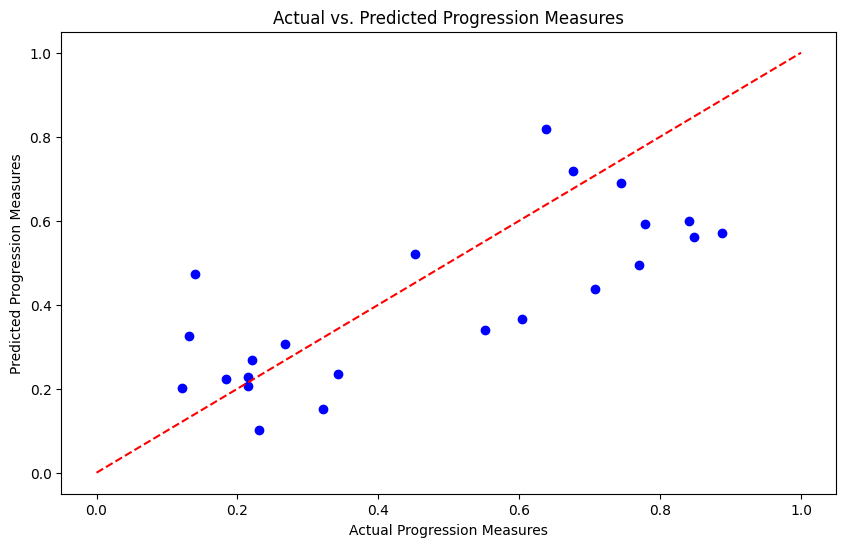

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # x=y line
plt.xlabel("Actual Progression Measures")
plt.ylabel("Predicted Progression Measures")
plt.title("Actual vs. Predicted Progression Measures")
plt.show()

In [130]:
# Metrics calculation on the training set
mse_train = get_mean_square_error(regression_model.predict(X_train), y_train)
mae_train = get_mean_absolute_error(regression_model.predict(X_train), y_train)
rmse_train = get_root_mean_square_error(regression_model.predict(X_train), y_train)
r2_train = get_r2_score(regression_model.predict(X_train), y_train)

# Metrics calculation on the testing set
mse_test = get_mean_square_error(y_pred, y_test)
mae_test = get_mean_absolute_error(y_pred, y_test)
rmse_test = get_root_mean_square_error(y_pred, y_test)
r2_test = get_r2_score(y_pred, y_test)

In [131]:
import pandas as pd
data = {
    'Data Type/Optimizer': ['Train Set', 'Test Set'],
    'MSE': [mse_train, mse_test],
    'MAE': [mae_train, mae_test],
    'RMSE': [rmse_train, rmse_test],
    'R² score': [r2_train, r2_test]
}
metrics_df = pd.DataFrame(data)
metrics_df.set_index('Data Type/Optimizer', inplace=True)
print(metrics_df.to_string())

                          MSE       MAE      RMSE  R² score
Data Type/Optimizer                                        
Train Set            0.027477  0.133844  0.165761  0.513588
Test Set             0.034123  0.153515  0.184725  0.516379


In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Metrics calculation using libraries
mse_train_lib = mean_squared_error(y_train, regression_model.predict(X_train))
mae_train_lib = mean_absolute_error(y_train, regression_model.predict(X_train))
rmse_train_lib = np.sqrt(mse_train_lib)
r2_train_lib = r2_score(y_train, regression_model.predict(X_train))

mse_test_lib = mean_squared_error(y_test, y_pred)
mae_test_lib = mean_absolute_error(y_test, y_pred)
rmse_test_lib = np.sqrt(mse_test_lib)
r2_test_lib = r2_score(y_test, y_pred)

In [133]:

data_lib = {
    'Data Type/Optimizer': ['Train Set', 'Test Set'],
    'MSE': [mse_train_lib, mse_test_lib],
    'MAE': [mae_train_lib, mae_test_lib],
    'RMSE': [rmse_train_lib, rmse_test_lib],
    'R² score': [r2_train_lib, r2_test_lib]
}
metrics_df_lib = pd.DataFrame(data_lib)
metrics_df_lib.set_index('Data Type/Optimizer', inplace=True)
print(metrics_df_lib.to_string())

                          MSE       MAE      RMSE  R² score
Data Type/Optimizer                                        
Train Set            0.027477  0.133844  0.165761  0.513588
Test Set             0.034123  0.153515  0.184725  0.516379


## Part 4: Ordinary Least Squares


In [134]:
import statsmodels.api as sm

In [135]:

model = sm.OLS(df["target"], df.drop("target", axis='columns'))
result = model.fit()
# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              290.0
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                   1.28e-184
Time:                        21:56:44   Log-Likelihood:                          164.60
No. Observations:                 442   AIC:                                     -309.2
Df Residuals:                     432   BIC:                                     -268.3
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Questions

# Q1 - Analyze and evaluate the values in Table (1)

The table shows the following metrics:

* MSE (Mean Squared Error): A common regression loss function that measures the average squared difference between the predicted values and the actual values. Lower MSE indicates a better fit.
* MAE (Mean Absolute Error):  A regression loss function that measures the average absolute difference between the predicted values and the actual values. Lower MAE indicates a better fit.
* RMSE (Root Mean Squared Error):  The square root of the MSE. Lower RMSE indicates a better fit.
* R² (R-squared): A coefficient of determination that reflects the percentage of variance in the dependent variable that can be explained by the independent variables. It ranges from 0 to 1, with a higher R² indicating a better fit.
* score: This metric is not specified, so it's difficult to say what it represents without additional context.

Here are some observations based on the data provided:

* Loss: The test set has a slightly higher loss (0.034123) compared to the training set (0.027477) across all the metrics (MSE, MAE, RMSE). This suggests that the model may be overfitting the training data. Overfitting happens when a model performs well on the training data but poorly on unseen data (generalizes poorly).
* Error: The test set also has slightly higher error values (MAE and RMSE) compared to the training set. This again suggests some overfitting.
* R²: The R² values are relatively low (around 0.5) for both the training and test sets. An R² of 1 indicates a perfect fit, but in practice, it's ideal to have an R² value closer to 1 but not necessarily 1. A low R² value could indicate that there are other factors affecting the target variable that are not captured by the model.
## Deeper Observations on Training and Test Set Performance
R-squared and Model Fit:
* The R² values for both training and test sets being around 0.5 indicate that the model explains only about half of the variance in the target variable. This could mean:
    * There might be significant external factors influencing the target variable that the model doesn't account for.
    * The chosen features might not be capturing the most relevant information for accurate prediction.
Impact on Predictions:
* It would be helpful to see how these observations translate to the actual predictions. Are the test set predictions significantly different from the actual values compared to the training set? This could reveal the severity of overfitting and its impact on real-world application.

Overall, the model seems to be performing reasonably wel.

# Q2 -  Review the R² and Adjusted R² values obtained in part 4
R-squared (R²)

* It is a statistical measure used in regression analysis that represents the proportion of the variance in the dependent variable that can be explained by the independent variables in the model. It ranges from 0 to 1, where:
    * A value of 0 indicates that the independent variables do not explain any of the variance in the dependent variable.
    * A value of 1 indicates that the independent variables explain all of the variance in the dependent variable, or in other words, a perfect fit.

Adjusted R-squared (Adjusted R²)

* This is a modification of R² that penalizes the model for having too many explanatory variables. As you add more variables to your model, the R² value typically increases. However, some of this increase may simply be due to the fact that you are fitting the noise in the data with more parameters. The adjusted R² value takes this into account and gives you a better idea of how well the model explains the variance in the data without overfitting.

Key Differences

Here's a table summarizing the key differences between R² and Adjusted R²:

| Metric | Description | Advantages | Disadvantages |
|---|---|---|---|
| R² | Represents the proportion of variance in the dependent variable explained by the independent variables. | Easy to interpret, Range bound (0 to 1) | Can be misleading if the model has too many variables |
| Adjusted R² | Penalizes R² for having too many variables, giving a better indication of fit for models with varying numbers of predictors. |  More suitable for comparing models with different numbers of variables | Can be lower than R², especially for models with many variables |

Implications of High or Low Values

* High R² and Adjusted R²: Generally good, indicating that the model explains a high proportion of the variance in the dependent variable. However, it's important to consider the possibility of overfitting, especially if the adjusted R² is much lower than the R².
* Low R² and Adjusted R²: This could mean that the model is not very good at explaining the variance in the dependent variable. There could be several reasons for this, such as:
    * Inaccurate or irrelevant independent variables
    * Non-linear relationships between the variables
    * Missing important variables from the model

In the specific case of the output you provided, the R² value is 0.87 and the Adjusted R² is 0.867. This suggests that the model explains a relatively high proportion of the variance in the dependent variable (target). However, the difference between R² and Adjusted R² is minimal, indicating that the model likely doesn't suffer from overfitting to a significant degree.

It's important to note that the "goodness" of R² and Adjusted R² values can vary depending on the field of study. In some disciplines, a value of 0.8 might be considered very good, while in others, it might be considered just moderate.

# Q3 - Review the p-values obtained in part 4

The null hypothesis assumes that the coefficient for a particular feature (regressor) is equal to zero (i.e., the feature has no effect on the response variable).

The alternative hypothesis states that the coefficient is not equal to zero (the feature does have an effect on the response).

The p-value represents the probability of observing a coefficient as extreme as the one estimated in the model (or more extreme) if the null hypothesis were true

If the p-value for a coefficient is small (less than 0.05), it suggests that the corresponding feature is statistically significant in predicting the response.

Conversely, if the p-value is large, the feature may not be significant.

**sex, bmi, bp ,s1, s5** are  statistically significant in predicting the target.

## Q4 - analyze the importance of each feature
  - age:

    A weak negetive impact on target(coefficient)

    Precise of coefficient is high(std err)

    Weak evidence against null hypothesis(zero coef) and negetive coefficient.
    (t)

    Is not statisticly significant based on high p-value and confidence  interval doesn't exclude zero


  - sex:

      A weak negetive impact on target(coefficient)

      Precise of coefficient is very high(std err)

      High evidence against null hypothesis(zero coef) and negetive coefficient.
      (t) so it has negetive statistical significant relation

      Is statisticly significant based on very low  p-value and confidence  interval excludes zero

- bmi:

    A powefull positive impact on target(coefficient)

    Precise of coefficient is high(std err)

    Very high evidence against null hypothesis(zero coef) and positive coefficient.
    (t) so it has positive statistical significant relation

    Is statisticly significant based on very low  p-value and confidence  interval excludes zero

  - bp:

      Is like bmi but a little less statistical signifant than bmi
      
      because loswer p-value and zero is more near its confidence interval.

  - s1:

      A powerfull negetive impact on target(coefficient)

      Precise of coefficient is low (std err)

      Powerfull evidence against null hypothesis(zero coef) and negetive coefficient.
      (t)

      Is statisticly significant based on high p-value and confidence  interval doesn't exclude zero

  - s2:

      A positive impact on target(coefficient)

      Precise of coefficient is low(std err)

      Appropriate evidence against null hypothesis(zero coef) and positive coefficient.
      (t)

      Is is not statisticly significant based on high p-value but 0 zero is in confidence interval but zero is near left side of interval.
  - s3:

      A weak negetive impact , also doesnt have statistical signficant in predicting

  - s4 and s6:

      A weak positive impact , also doesnt have statistical signficant in predicting

  - s5:
      is like bmi

# Correlation matrix

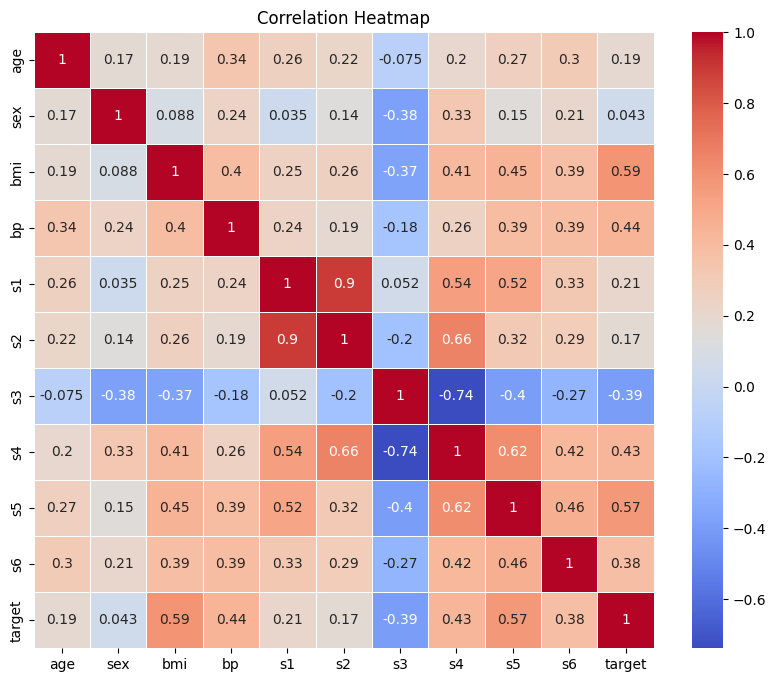

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation VS p-value.

Correlation is a way to test if two variables have any kind of relationship,

whereas p-value tells us if the result of an experiment is statistically significant

We plotted correlation to say that correlation and statistical signifcant in target don't have simmilar result always for example sex feature has low correlation but is statistical signifcant.

Sample-size or population properties are important here.

# A Brief Summary Of What We Did
In this assignment, we explored various loss functions and applied gradient descent methods to optimize these functions. Our focus was on the Diabetes dataset from the scikit-learn library, a well-regarded dataset in the machine learning community. This dataset consists of medical diagnostic measurements from numerous patients and is specifically designed to study diabetes progression. We used these data points to predict the quantitative measure of disease progression one year after baseline, thus practicing the application of regression analysis in a medical context.
